# PyTorch Intro: 



#### Import libs

torch is our main import   
nn is for building networks  


In [1]:
%matplotlib inline

import torch
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator

# 1. The Basics

### PyTorch is a lot like Numpy

Tensors are like numpy ndarrays

In [11]:
# Numpy ndarray
x = np.ndarray([4,3], dtype= float)
x

array([[  1.72723371e-077,  -1.49457807e-154,   2.96439388e-323],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  1.72723371e-077,   1.72723371e-077,   8.38743332e-309]])

In [186]:
# Pytorch tensor
x = torch.Tensor(4, 3)
x


 0.0000e+00  4.6566e-10 -3.1492e-32
-3.6902e+19  5.6052e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 4x3]

In [36]:
# Pytorch tensor
x = torch.Tensor(4, 3) 
x


1.00000e-10 *
  0.0000  4.6566  0.0000
  4.6566  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 4x3]

In [187]:
# Create a torch.Tensor object from a list
a_list = [[1., 2., 3.],[1., 2., 3.],[1., 2., 3.],[1., 2., 3.]]
x = torch.Tensor(a_list)
x


 1  2  3
 1  2  3
 1  2  3
 1  2  3
[torch.FloatTensor of size 4x3]

In [188]:
x_numpy = x.numpy()
x_numpy

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]], dtype=float32)

### When we make the change in numpy it also changes the tensor 

In [189]:
x_numpy += 1
x_numpy

array([[ 2.,  3.,  4.],
       [ 2.,  3.,  4.],
       [ 2.,  3.,  4.],
       [ 2.,  3.,  4.]], dtype=float32)

In [190]:
# the original tensor is also being changed
x


 2  3  4
 2  3  4
 2  3  4
 2  3  4
[torch.FloatTensor of size 4x3]

In [18]:
a = torch.from_numpy(x_numpy)

a


 2  3  4
 2  3  4
 2  3  4
 2  3  4
[torch.FloatTensor of size 4x3]

In [19]:
x_numpy += 1
x_numpy

array([[ 3.,  4.,  5.],
       [ 3.,  4.,  5.],
       [ 3.,  4.,  5.],
       [ 3.,  4.,  5.]], dtype=float32)

In [20]:
a


 3  4  5
 3  4  5
 3  4  5
 3  4  5
[torch.FloatTensor of size 4x3]

In [21]:
# changes don't always work both ways when going from numpy
x_numpy = x_numpy+5
x_numpy

array([[  8.,   9.,  10.],
       [  8.,   9.,  10.],
       [  8.,   9.,  10.],
       [  8.,   9.,  10.]], dtype=float32)

In [22]:
a


 3  4  5
 3  4  5
 3  4  5
 3  4  5
[torch.FloatTensor of size 4x3]

In [191]:
# numpy
x_numpy.shape

(4, 3)

In [192]:
# pytorch
x.size()

torch.Size([4, 3])

In [193]:
y = torch.rand(4, 3)
y


 0.6019  0.7672  0.1122
 0.8954  0.3107  0.6428
 0.8913  0.7155  0.5645
 0.0752  0.0832  0.2847
[torch.FloatTensor of size 4x3]

In [194]:
x + y


 2.6019  3.7672  4.1122
 2.8954  3.3107  4.6428
 2.8913  3.7155  4.5645
 2.0752  3.0832  4.2847
[torch.FloatTensor of size 4x3]

In [27]:
torch.add(x, y)


 3.3132  4.9746  5.4462
 3.7877  4.6107  5.6725
 3.6454  4.8530  5.7990
 3.5891  4.2007  5.9461
[torch.FloatTensor of size 4x3]

In [28]:
new_weights = torch.zeros(4, 3)
torch.add(x, y, out=new_weights)
new_weights


 3.3132  4.9746  5.4462
 3.7877  4.6107  5.6725
 3.6454  4.8530  5.7990
 3.5891  4.2007  5.9461
[torch.FloatTensor of size 4x3]

In [29]:
new_weights


 3.3132  4.9746  5.4462
 3.7877  4.6107  5.6725
 3.6454  4.8530  5.7990
 3.5891  4.2007  5.9461
[torch.FloatTensor of size 4x3]

### Inplace operations

`new_weights.add_(x)` # adds x to new_weights in-place

In [30]:
x.add_(new_weights) 


  6.3132   8.9746  10.4462
  6.7877   8.6107  10.6725
  6.6454   8.8530  10.7990
  6.5891   8.2007  10.9461
[torch.FloatTensor of size 4x3]

We can use numpy type slicing

In [31]:
new_weights[:,1]


 4.9746
 4.6107
 4.8530
 4.2007
[torch.FloatTensor of size 4]

In [32]:
new_weights[:,:2]


 3.3132  4.9746
 3.7877  4.6107
 3.6454  4.8530
 3.5891  4.2007
[torch.FloatTensor of size 4x2]

### Initializing Tensors

In [33]:
w = torch.zeros(4,3)
w


 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 4x3]

In [34]:
w = torch.ones(4,3)
w


 1  1  1
 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 4x3]

In [102]:
w = torch.rand(4,3)
w


 0.0881  0.9826  0.7000
 0.4179  0.1287  0.7984
 0.2769  0.1905  0.4446
 0.7382  0.4760  0.4820
[torch.FloatTensor of size 4x3]

### Reshaping

.view = .reshape

In [37]:
x = torch.rand(4,3) #rows , columns
x


 0.9218  0.0645  0.9826
 0.9045  0.8273  0.6109
 0.6134  0.3658  0.0979
 0.7491  0.1672  0.9281
[torch.FloatTensor of size 4x3]

In [38]:
x.view(2,3,2) # channels, rows , columns


(0 ,.,.) = 
  0.9218  0.0645
  0.9826  0.9045
  0.8273  0.6109

(1 ,.,.) = 
  0.6134  0.3658
  0.0979  0.7491
  0.1672  0.9281
[torch.FloatTensor of size 2x3x2]

### CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [31]:
#x = x.cuda()
#y = y.cuda()

#x+y

# 2. Autograd : Automatic Differentiation 

Central to all neural networks in PyTorch is the `autograd` package.

The `autograd` package provides automatic differentiation for all operations on Tensors.  
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different. 

`autograd.Variable` is the central class of the package. 
It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. 

In [195]:
import torch
from torch.autograd import Variable

In [196]:
# setting up the variable to track the gradients
x = Variable(torch.ones(2, 2), requires_grad=True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [197]:
print(x.grad)

None


In [198]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [199]:
print(y.grad)

None


In [200]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



### Backprop

.backward does a backward pass to calculate your derivatives

In [201]:
#out.backward()

# if I don't want to zero out the grads after backpass
out.backward( retain_graph=True)

print gradients d(out)/dx

In [202]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



# 3. Neural Network

Lets build a small network to look at in action

In [150]:
class Net(nn.Module):
    #constructor class\
    def __init__(self):
        super(Net, self).__init__()
        #making our layers
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input channel, 6 output channels, 5x5 kernel creating 6 filters
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1   = nn.Linear(16*5*5, 120) # like keras' Dense() taking [16,5,5] as the input
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        return reduce(operator.mul, x.size()[1:])

In [151]:
net = Net()
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [152]:
# add GPU
#net.cuda();

In [153]:
params = list(net.parameters())
len(params), params[0].size()

(10, torch.Size([6, 1, 5, 5]))

In [154]:
input = Variable(torch.randn(1, 1, 32, 32))#.cuda()
out = net(input) 
out

Variable containing:
1.00000e-02 *
  4.6245 -1.7639 -1.4646 -1.3736 -3.9529 -3.1786 -3.1650  7.4170 -4.7103 -7.8259
[torch.FloatTensor of size 1x10]

In [155]:
net.zero_grad() # zeroes the gradient buffers of all parameters
out.backward(torch.randn(1, 10))#.cuda()) # backprops with random gradients

In [156]:
output = net(input)
target = Variable(torch.arange(0, 10))#.cuda()  # a dummy target, for example
loss = nn.MSELoss()(output, target)
loss

Variable containing:
 28.7334
[torch.FloatTensor of size 1]

In [157]:
# now we shall call loss.backward(), and have a look at gradients before and after
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -4.2302
 -1.4073
 -3.2849
 -1.0009
 -0.8512
 -2.6357
[torch.FloatTensor of size 6]



In [158]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = nn.MSELoss()(output, target) #compare the output to the target
loss.backward() # calculate the gradients
optimizer.step() # Does the update

## Debug the network tensor sizes

In [159]:
#debugging with good ole print statements
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5) # 1 input channel, 6 output channels, 5x5 kernel creating 6 filters
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1   = nn.Linear(512, 120) # like Dense layer
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        print(x.size())
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        print(x.size())
        x = x.view(-1, self.num_flat_features(x)) #flatten
        print(x.size())
        x = F.relu(self.fc1(x))
        print(x.size())
        x = F.relu(self.fc2(x))
        print(x.size())
        x = self.fc3(x)
        print(x.size())
        return x
    
    def num_flat_features(self, x):
        return reduce(operator.mul, x.size()[1:])

In [160]:
net = Net()
params = list(net.parameters())
len(params), params[0].size()

(10, torch.Size([16, 1, 5, 5]))

In [161]:
input = Variable(torch.randn(1, 1, 28, 28))#.cuda()
out = net(input) 
out

torch.Size([1, 16, 12, 12])
torch.Size([1, 32, 4, 4])
torch.Size([1, 512])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 10])


Variable containing:
-0.0710 -0.0942  0.0737  0.0912  0.1250 -0.0663 -0.1040  0.0560 -0.0219  0.0975
[torch.FloatTensor of size 1x10]

# 3. Building a Classifier: putting it all together

In [162]:
import torch
import torchvision
import torchvision.transforms as transforms

In [163]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


  car plane   dog  frog


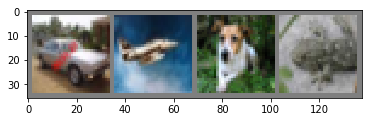

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [166]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [167]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [168]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.203
[1,  4000] loss: 1.850
[1,  6000] loss: 1.666
[1,  8000] loss: 1.573
[1, 10000] loss: 1.484
[1, 12000] loss: 1.430
[2,  2000] loss: 1.353
[2,  4000] loss: 1.333
[2,  6000] loss: 1.320
[2,  8000] loss: 1.292
[2, 10000] loss: 1.282
[2, 12000] loss: 1.254
Finished Training


GroundTruth:    cat  ship  ship plane


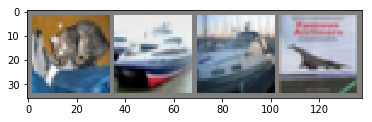

In [169]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [176]:
outputs = net(Variable(images))

In [178]:
_, predicted = torch.max(outputs.data, 1)
predicted


 3
 8
 8
 8
[torch.LongTensor of size 4]

In [185]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


## Lets make it for GPU

In [ ]:
net.cuda()

In [ ]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())